In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Office & Administration Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,training_total_meetings,training_price,discount_training,satisfaction_level,training_session,number_of_perticipant,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,17,6000000.0,50,5,17,20,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,17,6000000.0,50,5,17,18,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,14,6000000.0,50,5,17,18,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,17,6000000.0,50,5,17,20,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Powerful Database Analysis & Dashboard Reporti...,Interactive Dashboard with Microsoft Excel
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,17,5500000.0,50,5,16,19,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel


## Univariatee Analysis

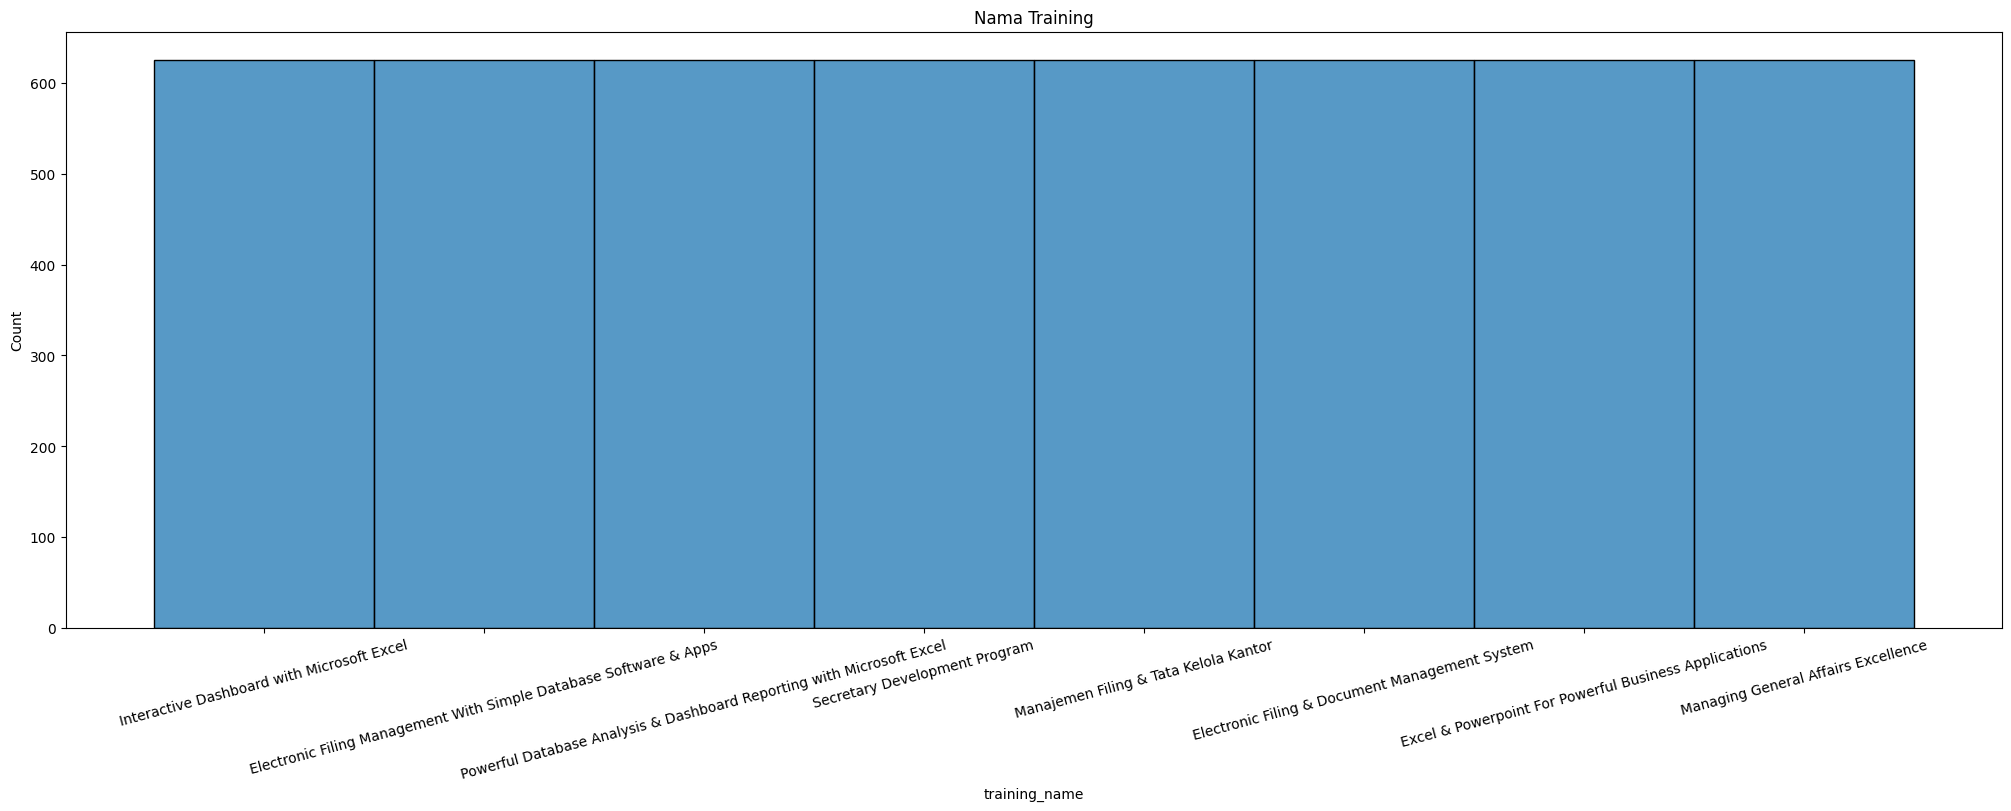

Interactive Dashboard with Microsoft Excel                               625
Electronic Filing Management With Simple Database Software & Apps        625
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel    625
Secretary Development Program                                            625
Manajemen Filing & Tata Kelola Kantor                                    625
Electronic Filing & Document Management System                           625
Excel & Powerpoint For Powerful Business Applications                    625
Managing General Affairs Excellence                                      625
Name: training_name, dtype: int64


In [3]:
# training_name
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["training_name"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["training_name"].value_counts())

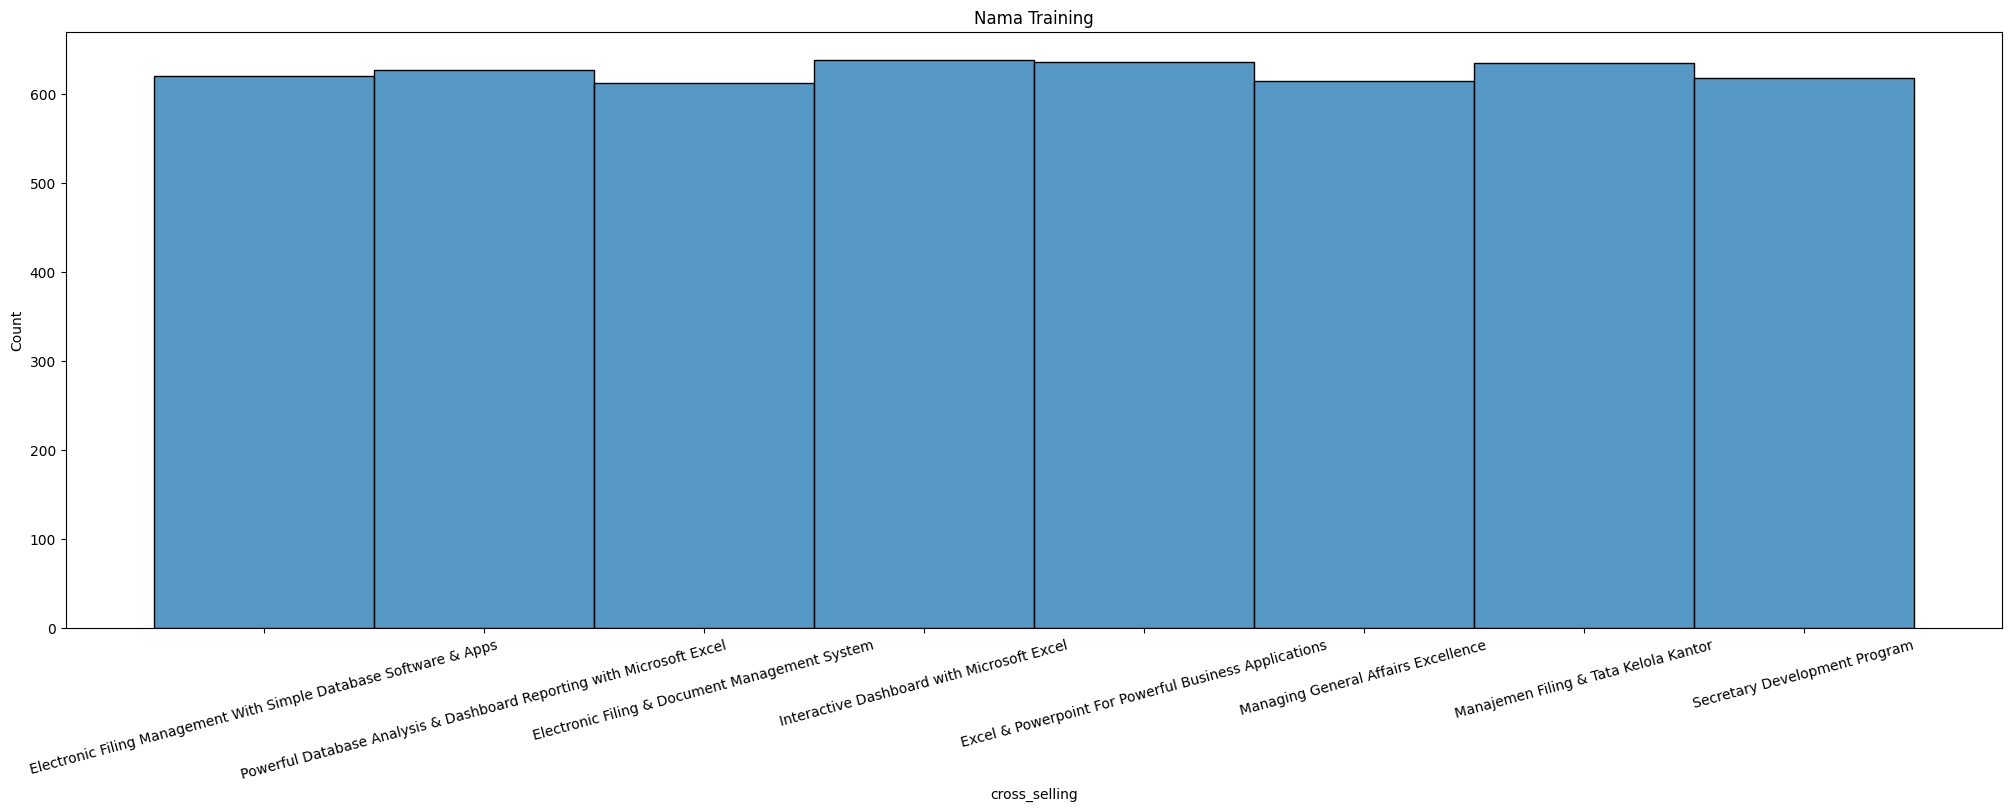

Interactive Dashboard with Microsoft Excel                               638
Excel & Powerpoint For Powerful Business Applications                    636
Manajemen Filing & Tata Kelola Kantor                                    635
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel    627
Electronic Filing Management With Simple Database Software & Apps        620
Secretary Development Program                                            618
Managing General Affairs Excellence                                      614
Electronic Filing & Document Management System                           612
Name: cross_selling, dtype: int64


In [4]:
# Cross Selling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["cross_selling"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["cross_selling"].value_counts())

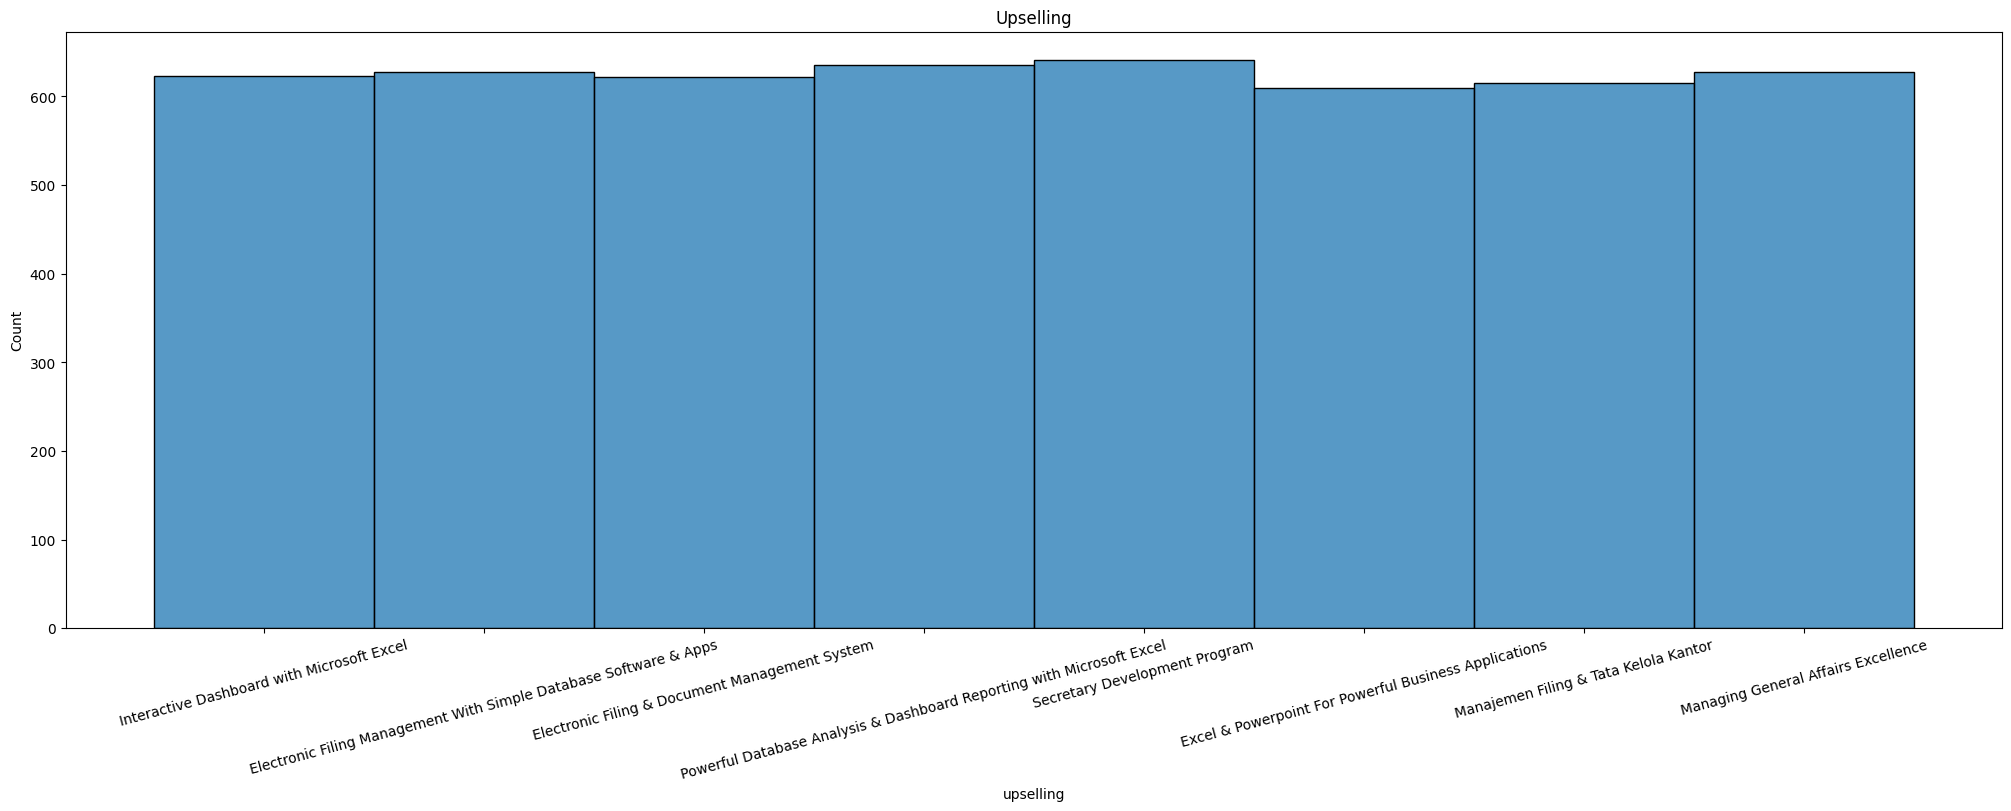

Secretary Development Program                                            641
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel    635
Managing General Affairs Excellence                                      628
Electronic Filing Management With Simple Database Software & Apps        627
Interactive Dashboard with Microsoft Excel                               623
Electronic Filing & Document Management System                           622
Manajemen Filing & Tata Kelola Kantor                                    615
Excel & Powerpoint For Powerful Business Applications                    609
Name: upselling, dtype: int64


In [5]:
# Upselling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["upselling"], ax=ax)
ax.set_title("Upselling")
plt.xticks(rotation=15)
plt.show()
print(df["upselling"].value_counts())

<Axes: >

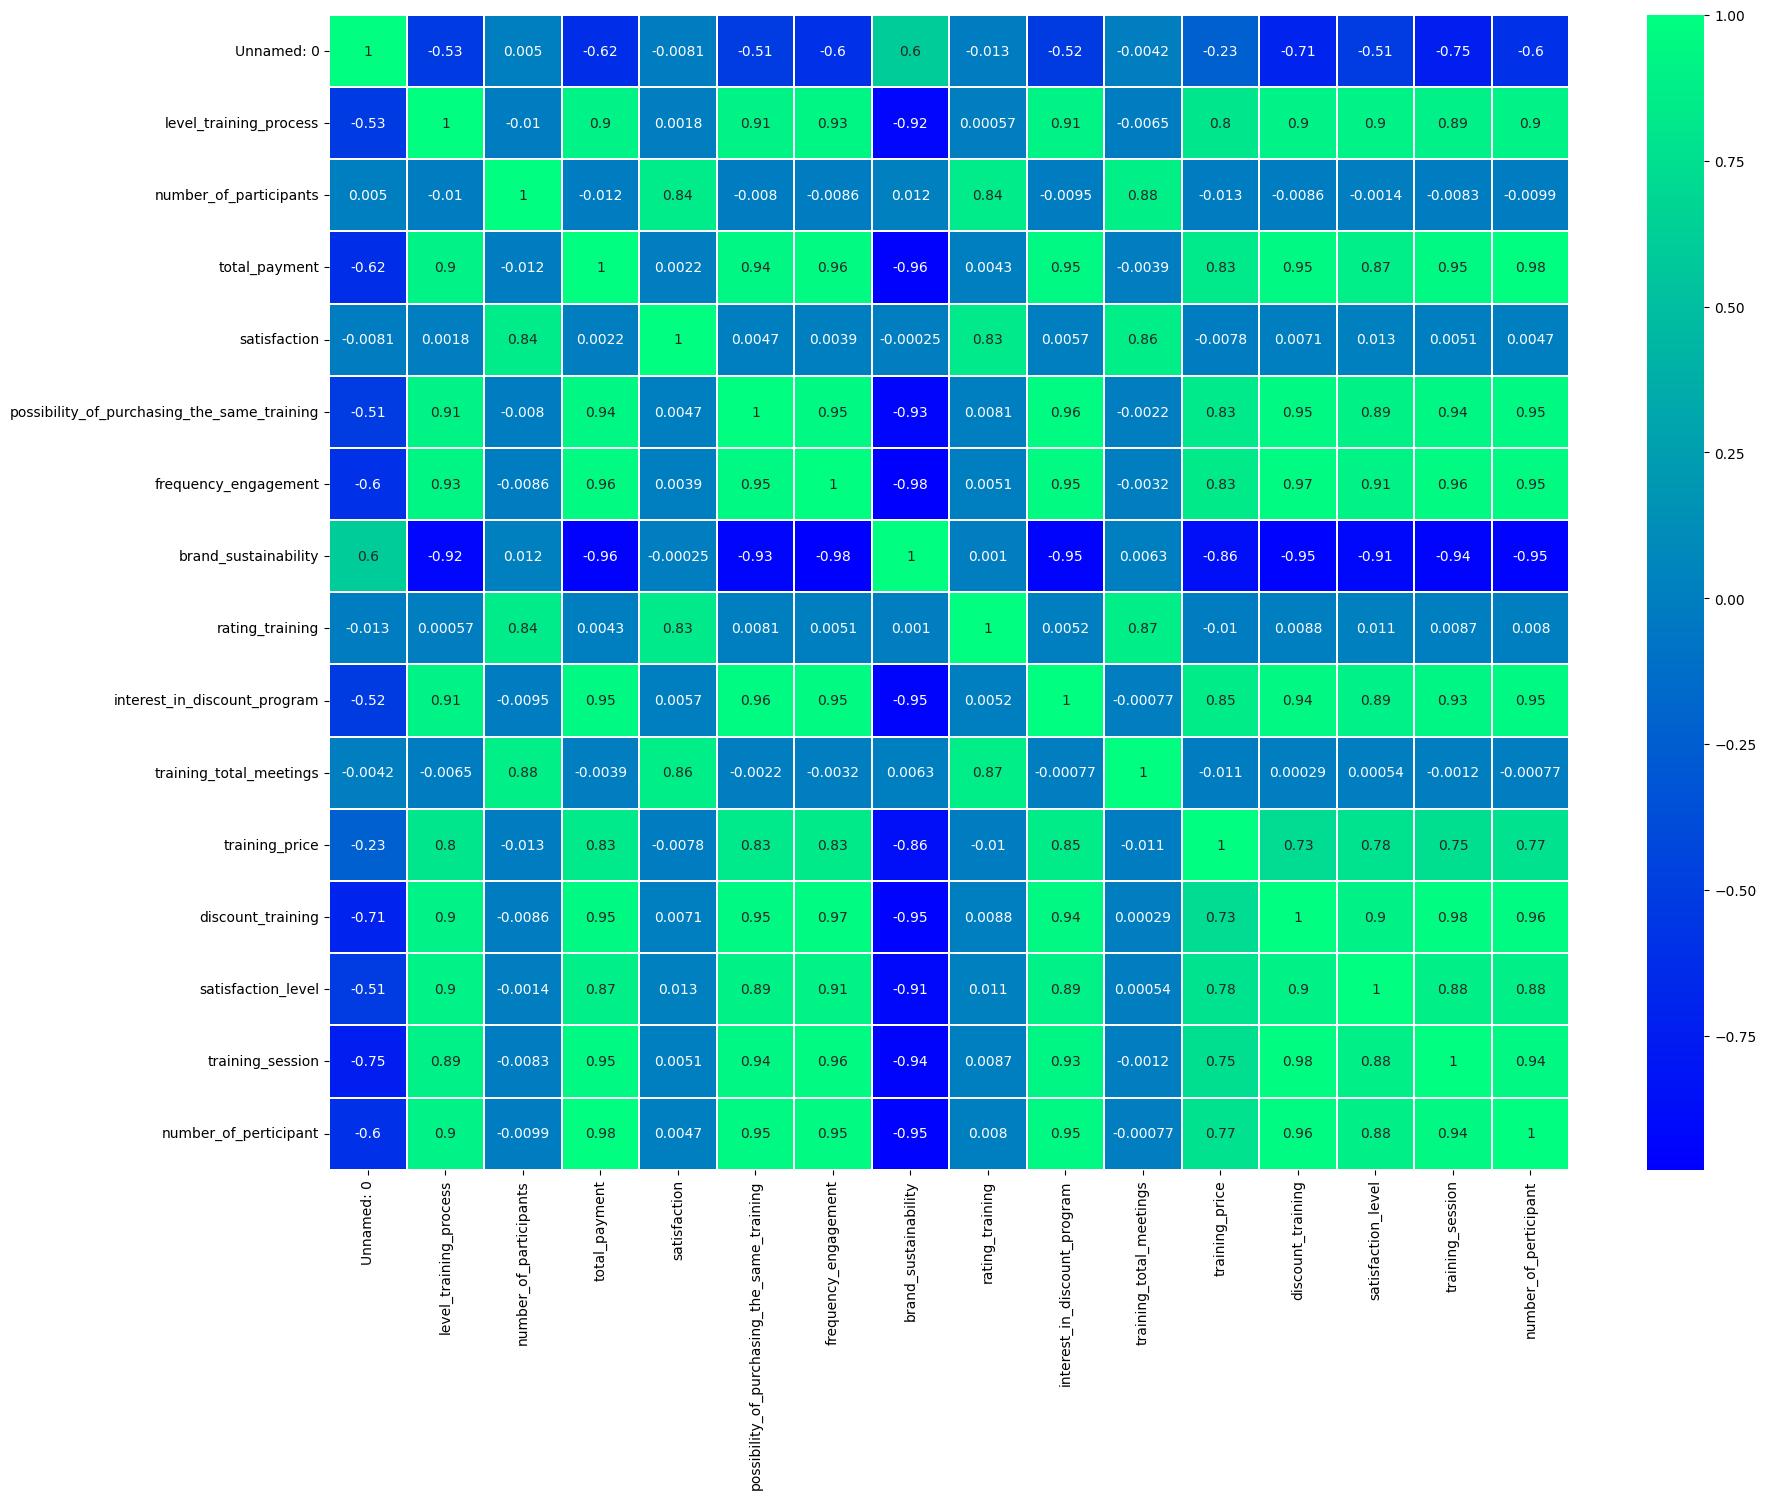

In [6]:
num_columns = [i for i in df.columns if df[i].dtype != "object"]
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df[num_columns].corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)

<Axes: >

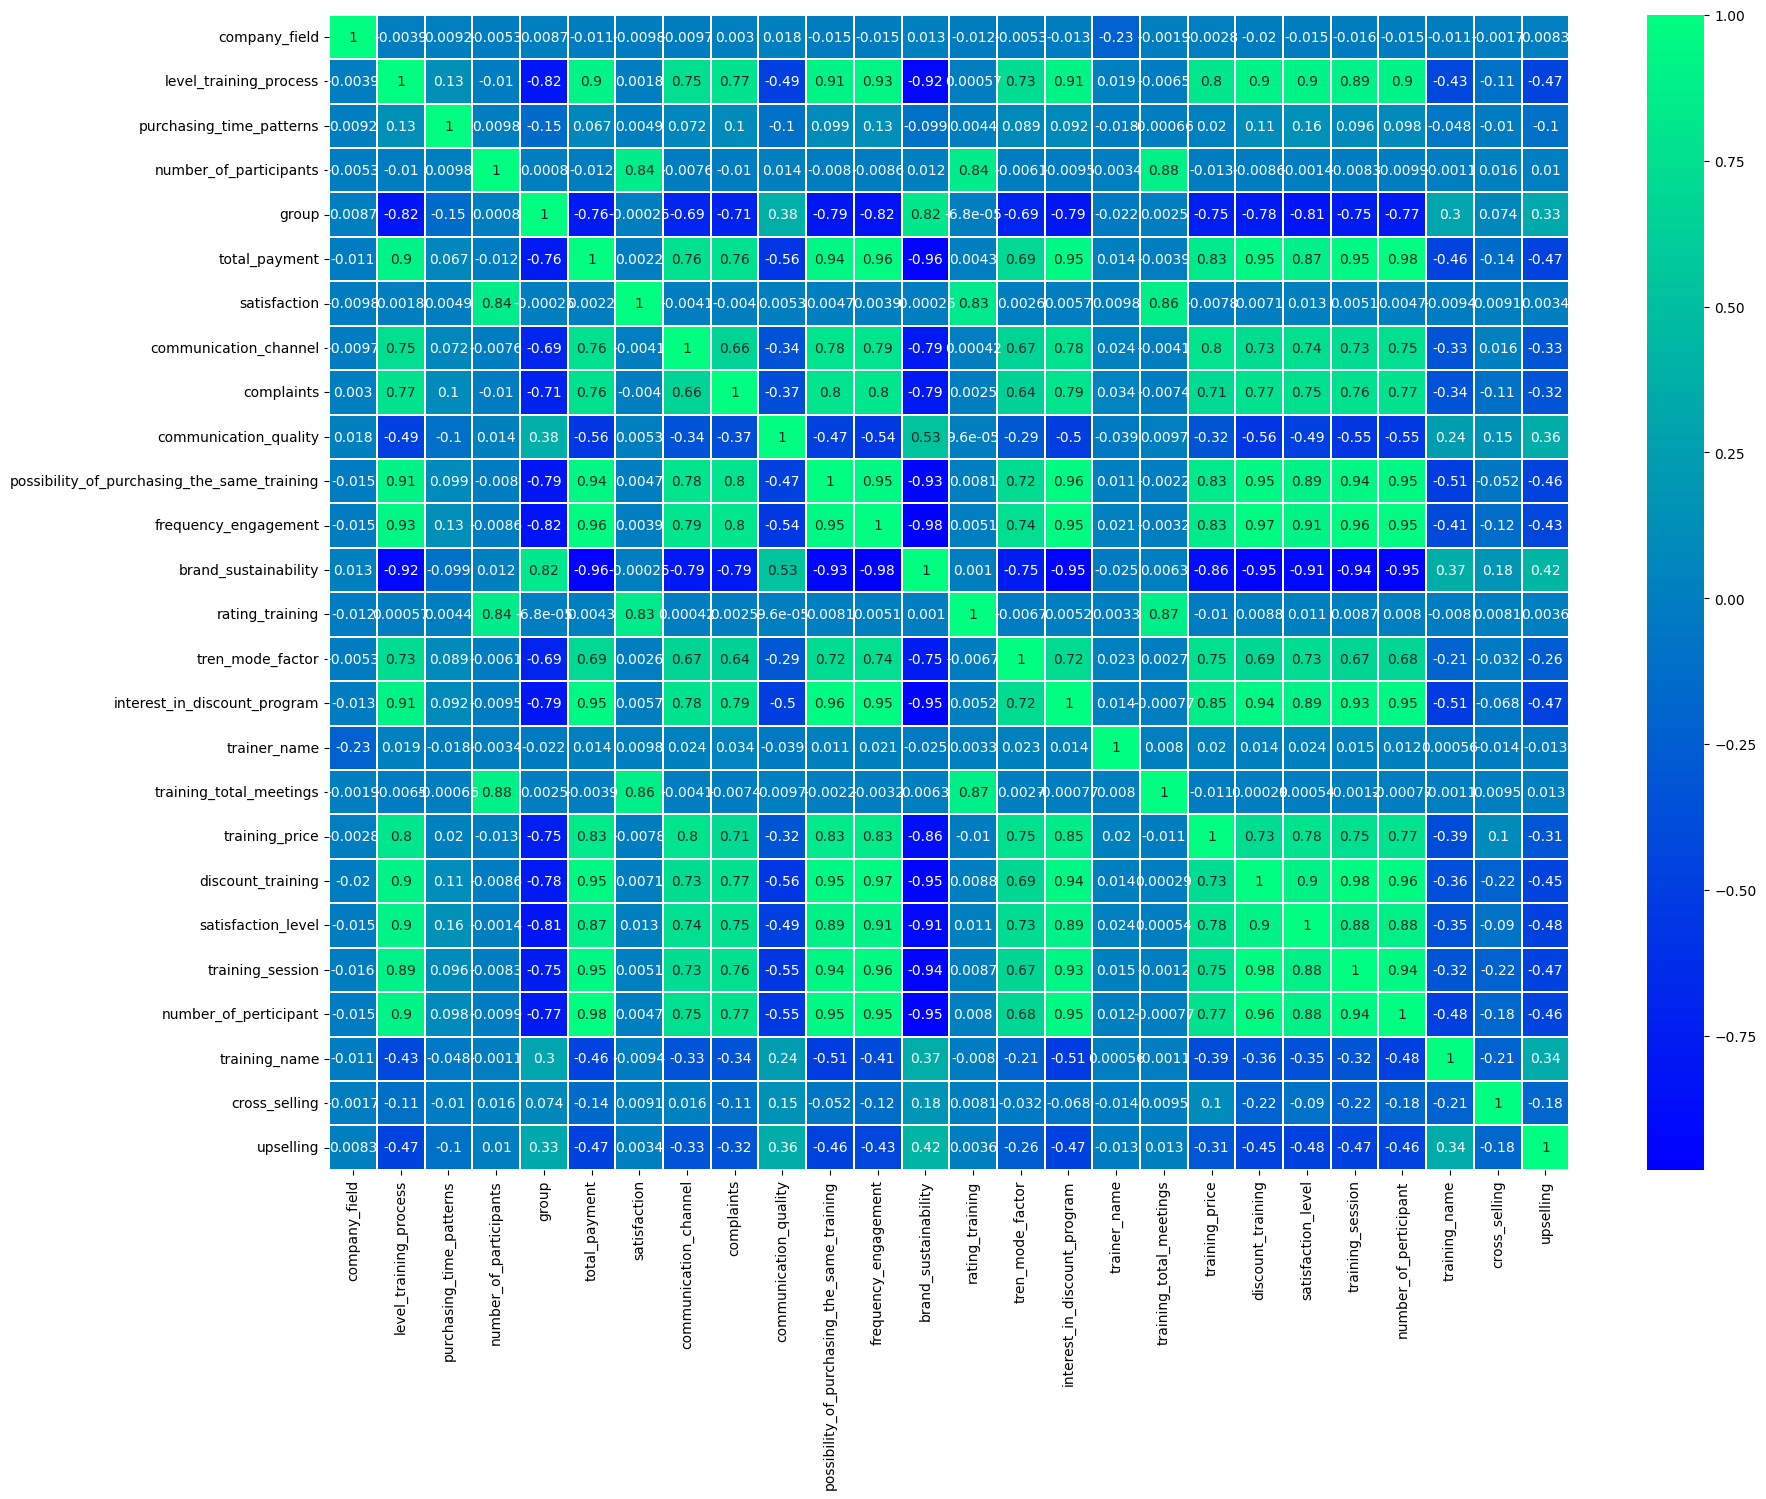

In [7]:
from sklearn.preprocessing import LabelEncoder
# Scaling category variable

columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])

df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_type", "training_ID"
], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)